# PyMC-GP Examples

In [ ]:
# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌïú ÎûúÎç§ ÏãúÎìú ÏÑ§Ï†ï
np.random.seed(42)

# 2. ÎπÑÏÑ†Ìòï Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
# ---------------------
# GPÍ∞Ä ÌïôÏäµÌï† ÏÉòÌîå Îç∞Ïù¥ÌÑ∞Î•º ÎßåÎì≠ÎãàÎã§. sin Ìï®ÏàòÏóê ÎÖ∏Ïù¥Ï¶àÎ•º Ï∂îÍ∞ÄÌï©ÎãàÎã§.
X = np.linspace(0, 10, 20)[:, None]  # 20Í∞úÏùò ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏
true_func = lambda x: np.sin(x) * 1.5
y = true_func(X).ravel() + np.random.normal(0, 0.4, 20) # Ïã§Ï†ú Ìï®ÏàòÍ∞íÏóê ÎÖ∏Ïù¥Ï¶à Ï∂îÍ∞Ä


# 3. PyMCÎ•º Ïù¥Ïö©Ìïú GP Î™®Îç∏ Ï†ïÏùò
# ----------------------------
with pm.Model() as gp_model:
    # --- Ïª§ÎÑê ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Ïóê ÎåÄÌïú ÏÇ¨Ï†ÑÎ∂ÑÌè¨(Priors) ÏÑ§Ï†ï ---
    # Í∏∏Ïù¥Ï≤ôÎèÑ(lengthscale, ‚Ñì): Ìï®ÏàòÍ∞Ä ÏñºÎßàÎÇò Î∂ÄÎìúÎü¨Ïö¥ÏßÄÎ•º Ï†úÏñ¥Ìï©ÎãàÎã§.
    # Gamma Î∂ÑÌè¨Î•º ÏÇ¨Ïö©Ìï¥ ÏñëÏàò Í∞íÏùÑ Í∞ÄÏßÄÎèÑÎ°ù Ìï©ÎãàÎã§.
    lengthscale = pm.Gamma("‚Ñì", alpha=2, beta=0.5)

    # Ï∂úÎ†• Ïä§ÏºÄÏùº(output-scale, Œ∑): Ìï®ÏàòÏùò ÌèâÍ∑†Ï†ÅÏù∏ Î≥ÄÎèôÌè≠ÏùÑ Ï†úÏñ¥Ìï©ÎãàÎã§.
    # HalfCauchy Î∂ÑÌè¨Îäî ÏñëÏàò Í∞íÏùÑ Í∞ÄÏßÄÎ©∞, Í∞ÄÎÅî ÌÅ∞ Í∞íÏù¥ ÎÇòÏò¨ Ïàò ÏûàÎèÑÎ°ù Ïú†Ïó∞ÏÑ±ÏùÑ Ï§çÎãàÎã§.
    eta = pm.HalfCauchy("Œ∑", beta=3)

    # --- Ïª§ÎÑê(Í≥µÎ∂ÑÏÇ∞ Ìï®Ïàò) Ï†ïÏùò ---
    # ExpQuad(Squared Exponential) Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§. Í∞ÄÏû• ÏùºÎ∞òÏ†ÅÏù∏ ÏÑ†ÌÉùÏûÖÎãàÎã§.
    # ÏúÑÏóêÏÑú Ï†ïÏùòÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞(ÌôïÎ•† Î≥ÄÏàò)Î•º Ïª§ÎÑêÏóê Ï†ÑÎã¨Ìï©ÎãàÎã§.
    cov_func = eta**2 * pm.gp.cov.ExpQuad(input_dim=1, ls=lengthscale)

    # --- GP ÏÇ¨Ï†ÑÎ∂ÑÌè¨(Prior) Ï†ïÏùò ---
    # pm.gp.LatentÎ•º ÏÇ¨Ïö©Ìï¥ Ïû†Ïû¨(Latent) GPÎ•º Ï†ïÏùòÌï©ÎãàÎã§.
    # Ïù¥ GPÎäî Ïö∞Î¶¨Í∞Ä Ï∂îÏ†ïÌïòÍ≥†Ïûê ÌïòÎäî Ïã§Ï†ú Ìï®Ïàò f(x)Ïóê ÎåÄÌïú ÏÇ¨Ï†Ñ ÎØøÏùåÏûÖÎãàÎã§.
    gp = pm.gp.Latent(cov_func=cov_func)

    # Î™®Îç∏Ïù¥ ÌïôÏäµÌï† Îç∞Ïù¥ÌÑ∞ XÏóê ÎåÄÌï¥ GP ÏÇ¨Ï†ÑÎ∂ÑÌè¨Î°úÎ∂ÄÌÑ∞ Ìï®Ïàò fÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
    f = gp.prior("f", X=X)

    # --- Í∞ÄÎä•ÎèÑ(Likelihood) Ï†ïÏùò ---
    # Í¥ÄÏ∏° ÎÖ∏Ïù¥Ï¶à(sigma, œÉ)Ïóê ÎåÄÌïú ÏÇ¨Ï†ÑÎ∂ÑÌè¨Î•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
    sigma = pm.HalfCauchy("œÉ", beta=3)

    # Í¥ÄÏ∏°Îêú Îç∞Ïù¥ÌÑ∞ yÎäî Ïû†Ïû¨ Ìï®Ïàò fÏóê Ï†ïÍ∑úÎ∂ÑÌè¨ ÎÖ∏Ïù¥Ï¶à(sigma)Í∞Ä ÎçîÌï¥ÏßÑ Í≤∞Í≥ºÎùºÍ≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
    # Ïù¥Í≤ÉÏù¥ Îç∞Ïù¥ÌÑ∞ÏôÄ GP Î™®Îç∏ÏùÑ Ïó∞Í≤∞ÌïòÎäî ÌïµÏã¨ Î∂ÄÎ∂ÑÏûÖÎãàÎã§.
    y_obs = pm.Normal("y_obs", mu=f, sigma=sigma, observed=y)


# 4. MCMCÎ•º Ïù¥Ïö©Ìïú ÏÇ¨ÌõÑ Î∂ÑÌè¨ Ï∂îÎ°†
# -------------------------------
with gp_model:
    # PyMCÏùò NUTS ÏÉòÌîåÎü¨Î•º ÏÇ¨Ïö©Ìï¥ ÏÇ¨ÌõÑ Î∂ÑÌè¨ÏóêÏÑú 2000Í∞úÏùò ÏÉòÌîåÏùÑ Ï∂îÏ∂úÌï©ÎãàÎã§.
    # Ïù¥ Í≥ºÏ†ïÏóêÏÑú f, ‚Ñì, Œ∑, œÉ Îì± Î™®Îì† ÌôïÎ•† Î≥ÄÏàòÏùò ÏÇ¨ÌõÑ Î∂ÑÌè¨Í∞Ä Í≥ÑÏÇ∞Îê©ÎãàÎã§.
    trace = pm.sample(2000, tune=1000, cores=1)


Initializing NUTS using jitter+adapt_diag...
/home/lsw91/Workspace/pymc-gp/.venv/lib/python3.11/site-packages/pytensor/link/c/cmodule.py:2968: UserWarning: PyTensor could not link to a BLAS installation. Operations that might benefit from BLAS will be severely degraded.
This usually happens when PyTensor is installed via pip. We recommend it be installed via conda/mamba/pixi instead.
Alternatively, you can use an experimental backend such as Numba or JAX that perform their own BLAS optimizations, by setting `pytensor.config.mode == 'NUMBA'` or passing `mode='NUMBA'` when compiling a PyTensor function.
For more options and details see https://pytensor.readthedocs.io/en/latest/troubleshooting.html#how-do-i-configure-test-my-blas-library
  warnings.warn(
Sequential sampling (2 chains in 1 job)
NUTS: [‚Ñì, Œ∑, f_rotated_, œÉ]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 66 seconds.
There were 376 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


TypeError: Latent.conditional() missing 1 required positional argument: 'Xnew'

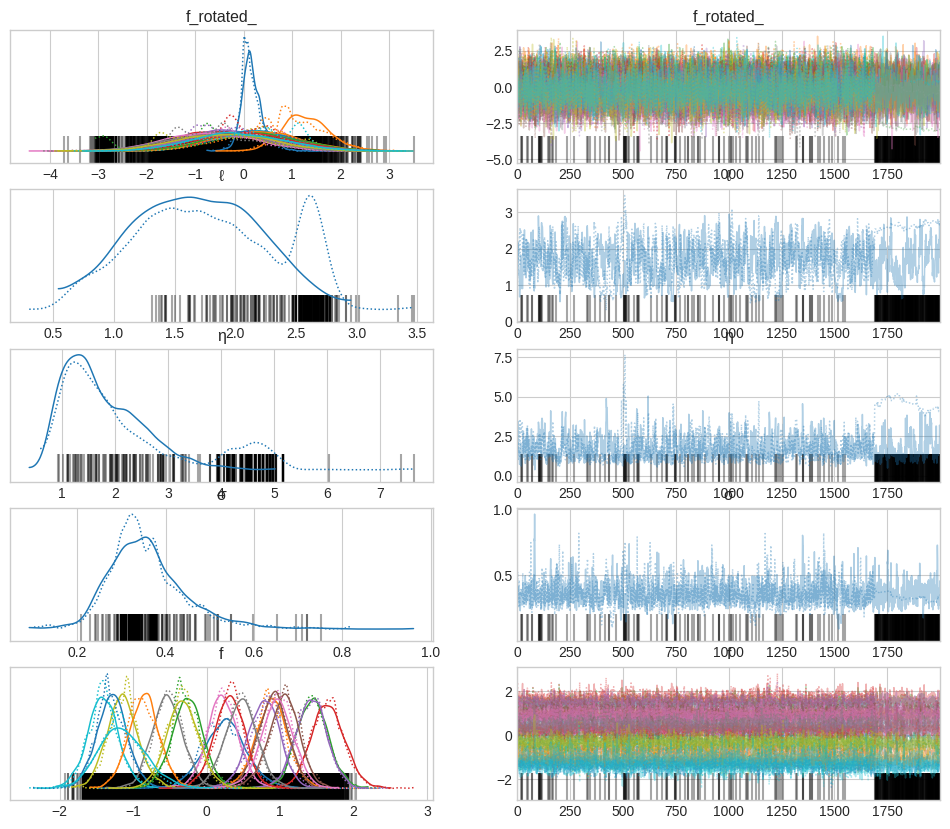

In [9]:
az.plot_trace(trace)
plt.show()

In [11]:
# 5. ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
# ---------------------------
# ÏòàÏ∏°ÏùÑ ÏàòÌñâÌï† ÏÉàÎ°úÏö¥ xÏ¢åÌëú(X_new)Î•º Ï¥òÏ¥òÌïòÍ≤å ÏÉùÏÑ±Ìï©ÎãàÎã§.
Xnew = np.linspace(-2, 12, 100)[:, None]

with gp_model:
    # gp.conditional Î©îÏÑúÎìúÎäî ÌïôÏäµÎêú ÏÇ¨ÌõÑ Î∂ÑÌè¨Î•º Í∏∞Î∞òÏúºÎ°ú,
    # ÏÉàÎ°úÏö¥ ÏûÖÎ†• X_newÏóê ÎåÄÌïú Ìï®Ïàò Í∞í(f_new)Ïùò Î∂ÑÌè¨Î•º Í≥ÑÏÇ∞Ìï¥Ï§çÎãàÎã§.
    f_pred = gp.conditional("f_pred", Xnew=Xnew)

ValueError: Variable name f_pred already exists.

In [12]:
with gp_model:
    # ÏúÑÏóêÏÑú Ï†ïÏùòÌïú Ï°∞Í±¥Î∂Ä Î∂ÑÌè¨Î°úÎ∂ÄÌÑ∞ ÏòàÏ∏° ÏÉòÌîåÏùÑ Ï∂îÏ∂úÌï©ÎãàÎã§.
    # Ïù¥Í≤ÉÏù¥ "ÏÇ¨ÌõÑ ÏòàÏ∏° ÏÉòÌîåÎßÅ" Í≥ºÏ†ïÏûÖÎãàÎã§.
    pred_samples = pm.sample_posterior_predictive(trace, var_names=["f_pred"])

Sampling: [f_pred]


Output()

In [15]:
pred_samples

Inference data with groups:
	> posterior_predictive
	> observed_data

In [18]:
pred_samples.posterior_predictive["f_pred"]

<xarray.DataArray 'f_pred' (chain: 2, draw: 2000, f_pred_dim_0: 100)> Size: 3MB
array([[[-6.11985426e-01, -3.79761491e-01, -2.02484116e-01, ...,
         -2.48408282e+00, -2.18507251e+00, -1.85175034e+00],
        [-2.36850338e+00, -2.33059873e+00, -2.26942929e+00, ...,
         -3.87003274e+00, -3.83756161e+00, -3.77287319e+00],
        [-9.82453093e-01, -1.03706747e+00, -1.07075240e+00, ...,
         -1.25617374e+00, -1.03361900e+00, -7.96512456e-01],
        ...,
        [-4.39330633e+00, -4.26170469e+00, -4.09631677e+00, ...,
         -3.66960465e+00, -3.70014729e+00, -3.69970269e+00],
        [-4.78117507e+00, -4.60641627e+00, -4.40621781e+00, ...,
         -3.14577821e+00, -3.10384289e+00, -3.04059595e+00],
        [-8.64644118e-01, -8.97029228e-01, -9.20210181e-01, ...,
         -1.73390552e+00, -1.64176470e+00, -1.53012196e+00]],

       [[ 5.27562002e-01,  7.32712055e-01,  9.44670905e-01, ...,
         -7.49618078e-01, -1.05113725e+00, -1.33453353e+00],
        [-7.05315130e-01, -4.90081859e-01, -2.86907990e-01, ...,
          1.00274740e-03,  2.84685054e-01,  5.15840381e-01],
        [-2.30626663e-03,  3.30941445e-02,  3.50301485e-02, ...,
         -1.29637273e+00, -1.14562735e+00, -9.98187077e-01],
        ...,
        [-2.09895459e+00, -1.99438000e+00, -1.86916129e+00, ...,
         -3.99143188e+00, -4.14776532e+00, -4.28470153e+00],
        [-2.13764944e+00, -2.01125624e+00, -1.87066918e+00, ...,
         -4.23198188e+00, -4.45932830e+00, -4.68090821e+00],
        [-1.71204090e+00, -1.65452511e+00, -1.57558533e+00, ...,
         -4.25396996e+00, -4.47311929e+00, -4.68194312e+00]]],
      shape=(2, 2000, 100))
Coordinates:
  * chain         (chain) int64 16B 0 1
  * draw          (draw) int64 16kB 0 1 2 3 4 5 ... 1995 1996 1997 1998 1999
  * f_pred_dim_0  (f_pred_dim_0) int64 800B 0 1 2 3 4 5 6 ... 94 95 96 97 98 99

In [22]:
posterior_predictive_samples

<xarray.DataArray 'f_pred' (f_pred_dim_0: 100, sample: 4000)> Size: 3MB
array([[-0.61198543, -2.36850338, -0.98245309, ..., -2.09895459,
        -2.13764944, -1.7120409 ],
       [-0.37976149, -2.33059873, -1.03706747, ..., -1.99438   ,
        -2.01125624, -1.65452511],
       [-0.20248412, -2.26942929, -1.0707524 , ..., -1.86916129,
        -1.87066918, -1.57558533],
       ...,
       [-2.48408282, -3.87003274, -1.25617374, ..., -3.99143188,
        -4.23198188, -4.25396996],
       [-2.18507251, -3.83756161, -1.033619  , ..., -4.14776532,
        -4.4593283 , -4.47311929],
       [-1.85175034, -3.77287319, -0.79651246, ..., -4.28470153,
        -4.68090821, -4.68194312]], shape=(100, 4000))
Coordinates:
  * f_pred_dim_0  (f_pred_dim_0) int64 800B 0 1 2 3 4 5 6 ... 94 95 96 97 98 99
  * sample        (sample) object 32kB MultiIndex
  * chain         (sample) int64 32kB 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1
  * draw          (sample) int64 32kB 0 1 2 3 4 5 ... 1995 1996 1997 1998 1999

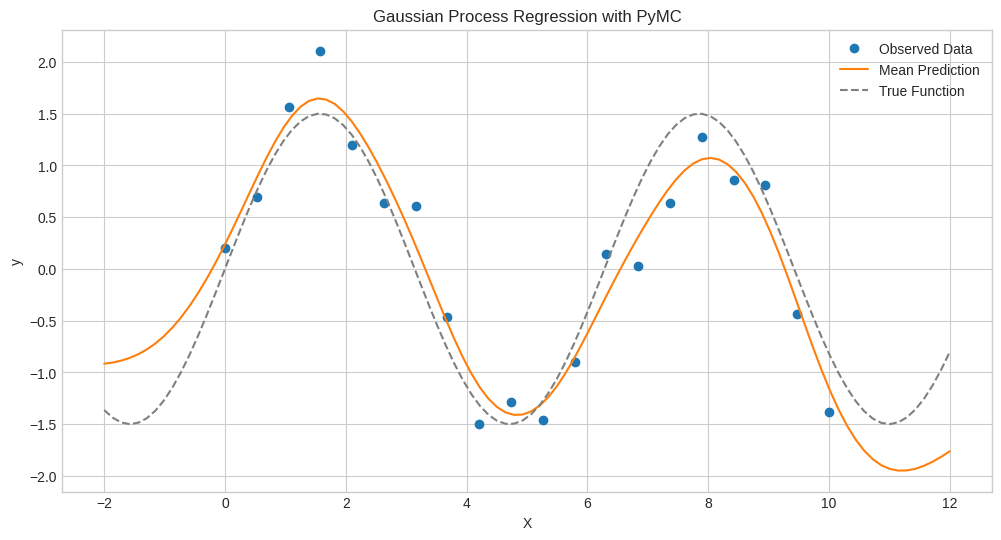

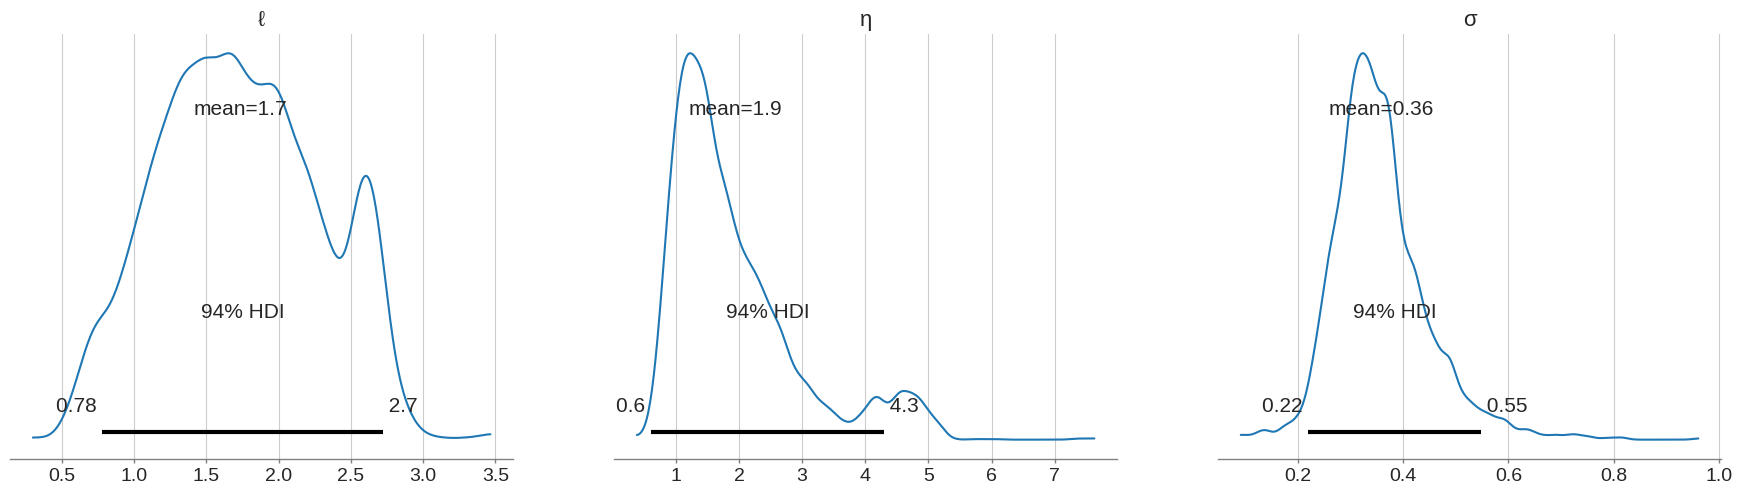

In [23]:
# 6. Í≤∞Í≥º ÏãúÍ∞ÅÌôî
# --------------
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))

# ÏÇ¨ÌõÑ ÏòàÏ∏°Ïùò ÌèâÍ∑†Í≥º Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞
# pred_samplesÏóêÏÑú f_predÏùò ÏÉòÌîåÎì§ÏùÑ Í∞ÄÏ†∏ÏòµÎãàÎã§.
posterior_predictive_samples = az.extract(pred_samples.posterior_predictive, var_names='f_pred')
mean_pred = posterior_predictive_samples.mean(axis=1) # ÏÉòÌîåÎì§Ïùò ÌèâÍ∑† -> ÏòàÏ∏° ÌèâÍ∑† Ìï®Ïàò
# hdi_94 = az.hdi(posterior_predictive_samples, hdi_prob=0.94) # 94% ÏµúÍ≥† Î∞ÄÎèÑ Íµ¨Í∞Ñ(HDI)

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÌîåÎ°úÌåÖ (ÌååÎûÄÏÉâ Ï†ê)
ax.plot(X, y, 'o', color='tab:blue', label="Observed Data")

# GP ÏòàÏ∏° ÌèâÍ∑† ÌîåÎ°úÌåÖ (Ï£ºÌô©ÏÉâ ÏÑ†)
ax.plot(X_new, mean_pred, "-", color='tab:orange', label="Mean Prediction")

# # GP ÏòàÏ∏°Ïùò 94% Ïã†Î¢∞Íµ¨Í∞Ñ ÌîåÎ°úÌåÖ (Ï£ºÌô©ÏÉâ ÏùåÏòÅ)
# ax.fill_between(X_new.ravel(),
#                 hdi_94[:,0],
#                 hdi_94[:,1],
#                 color='tab:orange',
#                 alpha=0.3,
#                 label="94% HDI (Uncertainty)")

# Ïã§Ï†ú Ìï®Ïàò ÌîåÎ°úÌåÖ (ÌöåÏÉâ Ï†êÏÑ†)
ax.plot(X_new, true_func(X_new), '--', color='gray', label='True Function')


ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_title("Gaussian Process Regression with PyMC")
ax.legend()
plt.show()

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Ïùò ÏÇ¨ÌõÑ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
az.plot_posterior(trace, var_names=["‚Ñì", "Œ∑", "œÉ"]);
plt.show()